# 02. スペクトルのフィッティング, 積分

02. <u>**スペクトルのフィッティング,積分**</u>

    - `状況　:　ある分光装置の実験結果を分析したい。この装置ではスペクトルの微分した値が返ってくる。`  
       `スペクトルにはバックグラウンドノイズが乗っており、ノイズを上手に取り除いて処理したい`
    
        - **データ分析の目的**
            - *スペクトルの吸収の積分値を計算する*
        
        - **保有している実験データ**
            - *339[nm] ~ 440[nm]付近までのスペクトルを取得*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
from IPython.html.widgets import interact
# %matplotlib widget
%matplotlib inline

/opt/anaconda3/lib/python3.8/site-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_excel('./resources/spectrum.xlsx', header=None)
df.head()

,0,1
0,349.0,-2.9678
1,349.1,1.7821
2,349.2,0.9071
3,349.3,0.7821
4,349.4,0.7196


In [4]:
df2 = df.rename(columns={0: 'lambda', 1: 'Intensity'})

In [5]:
df2.head()

,lambda,Intensity
0,349.0,-2.9678
1,349.1,1.7821
2,349.2,0.9071
3,349.3,0.7821
4,349.4,0.7196


- **columns を変更**

    - `lambda　:　波長`
    
    
    - `Intensity　:　強度`

Text(0, 0.5, 'Intensity')

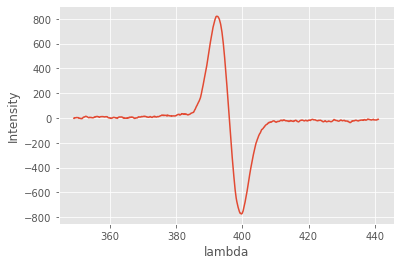

In [6]:
# まずはplotしてみる
plt.plot(df2['lambda'], df2['Intensity'])
plt.xlabel('lambda')
plt.ylabel('Intensity')

- **ノイズがありながら 380 ~ 400 の間に急襲がある**


### あえてfittingせずに数値積分してみる

In [7]:
# 数値積分　: (数値積分する値 ： その時の x : 数値積分をする時の初期値)
y_int = integrate.cumtrapz(df2['Intensity'], df2['lambda'], initial=0)  # 数値積分したものを受け取るモノ

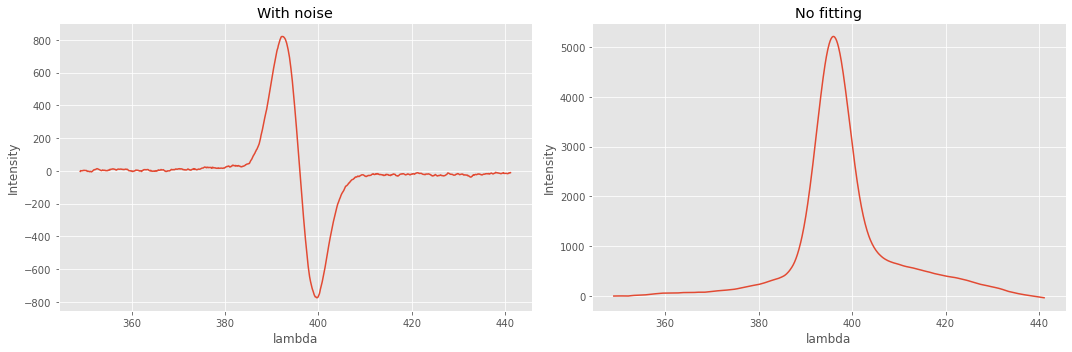

In [8]:
# 積分した結果を plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) # １行・２列のグラフが返ってくる
axes[0].plot(df2['lambda'], df2['Intensity'])
axes[0].set_xlabel('lambda')
axes[0].set_ylabel('Intensity')
axes[0].set_title('With noise')
axes[1].plot(df2['lambda'], y_int)
axes[1].set_xlabel('lambda')
axes[1].set_ylabel('Intensity')
axes[1].set_title('No fitting')
fig.tight_layout() 

- ノイズを消すことはできたが...
    - **ノイズも一緒に積分されてしまって、何もないところから数値が上がって来てしまう**
    - **吸収が終わった後も誤差が蓄積してしまう**


- <u>関数を fittingして数値積分をしなと変なカーバチャーになる</u>

### ガウス型の関数


### $$
y=e^{-\frac{(x-x_{0})^2}{2\sigma^2}}
$$

In [9]:
@interact(Intensity=(0, 800, 3), x0=(360, 420, 0.5), sigma=(0, 5, 0.5))
def animation(Intensity, x0, sigma):
    plt.plot(df2['lambda'], df2['Intensity'])                             # 生のdata
    x = df2['lambda']
    y = Intensity * (x0 - x) * np.exp(-0.5 * (x0 - x) ** 2 / sigma ** 2)  #  fittingをかける関数 ー> 微分
    plt.plot(x, y)
    plt.show()

interactive(children=(IntSlider(value=399, description='Intensity', max=800, step=3), FloatSlider(value=390.0,…

- **赤が生の data**

- **青が同じような関数を持っている、今からfittingをかける data**

- **Intensity, x0, sigma の値を調節して一致する場所を探す**

In [11]:
x = np.arange(350, 440, 0.001)
x0 = 396.0
Intensity = 399
sigma = 3.50
y = Intensity * (x0 - x) * np.exp(-0.5 * (x0 - x) ** 2 / sigma ** 2)  #  fittingをかける関数 ー> 微分

In [12]:
# y を数値積分する
y_int2 = integrate.cumtrapz(y, x, initial=0)

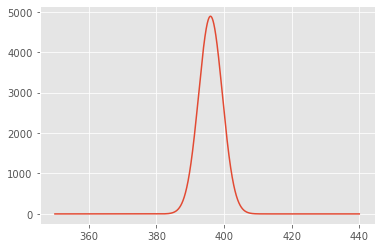

In [13]:
plt.plot(x, y_int2)

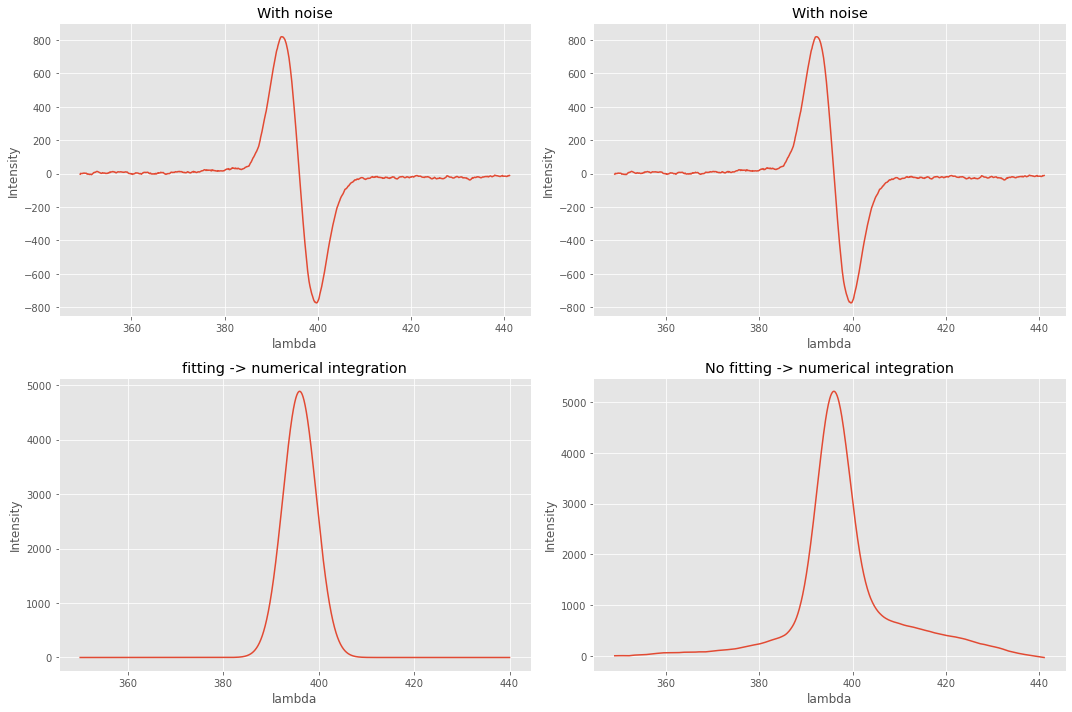

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10)) # １行・２列のグラフが返ってくる
axes[0, 0].plot(df2['lambda'], df2['Intensity'])
axes[0, 0].set_xlabel('lambda')
axes[0, 0].set_ylabel('Intensity')
axes[0, 0].set_title('With noise')
axes[0, 1].plot(df2['lambda'], df2['Intensity'])
axes[0, 1].set_xlabel('lambda')
axes[0, 1].set_ylabel('Intensity')
axes[0, 1].set_title('With noise')
axes[1, 0].plot(x, y_int2)
axes[1, 0].set_xlabel('lambda')
axes[1, 0].set_ylabel('Intensity')
axes[1, 0].set_title('fitting -> numerical integration')
axes[1, 1].plot(df2['lambda'], y_int)
axes[1, 1].set_xlabel('lambda')
axes[1, 1].set_ylabel('Intensity')
axes[1, 1].set_title('No fitting -> numerical integration')
fig.tight_layout() 

### 面積を求める為に数値積分

In [25]:
# 結果を受け取る変数 -> 数値積分
y_int3 = integrate.cumtrapz(y_int2, x, initial=0)

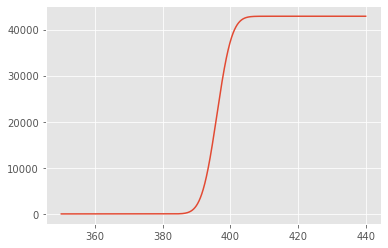

In [26]:
# plotする
plt.plot(x, y_int3)

- **吸収されるところに入ってくると一気に値が積分される。右側が積分された面積**

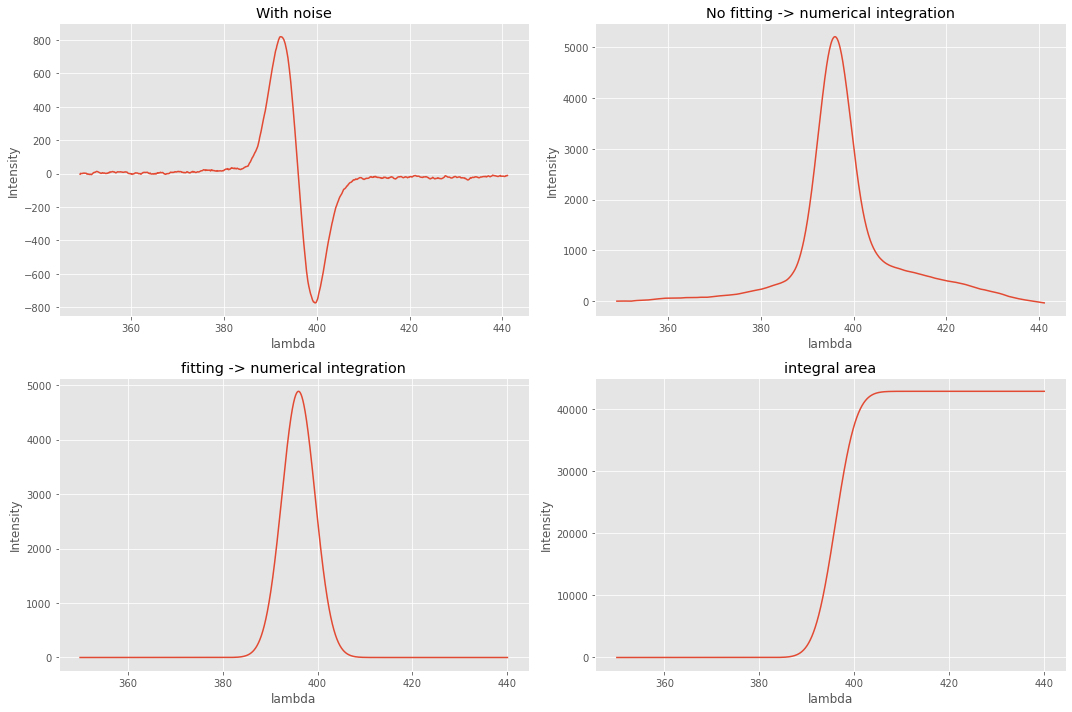

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10)) # １行・２列のグラフが返ってくる
axes[0, 0].plot(df2['lambda'], df2['Intensity'])
axes[0, 0].set_xlabel('lambda')
axes[0, 0].set_ylabel('Intensity')
axes[0, 0].set_title('With noise')
axes[0, 1].plot(df2['lambda'], y_int)
axes[0, 1].set_xlabel('lambda')
axes[0, 1].set_ylabel('Intensity')
axes[0, 1].set_title('No fitting -> numerical integration')
axes[1, 0].plot(x, y_int2)
axes[1, 0].set_xlabel('lambda')
axes[1, 0].set_ylabel('Intensity')
axes[1, 0].set_title('fitting -> numerical integration')
axes[1, 1].plot(x, y_int3)
axes[1, 1].set_xlabel('lambda')
axes[1, 1].set_ylabel('Intensity')
axes[1, 1].set_title('integral area')
fig.tight_layout() 